# Introduce Deep Learning UseCase for Business Production

### Report for Business side !!!


仮にビジネスサービス製品に人工知能プラットフォームを提供とすれば、MAデータ情報と顧客の独自情報を基にして、人工知能を顧客ニーズの個別カスタマイズにして、AIビジネスも展開できるではないでしょうかと考えました。

最初の段階はAIアシスタントの機能を顧客のサービスにデプロイし、色々なAI戦略のサービスをインテグレーションしてAIプラットフォームを展開する。

https://einstein.ai/products


そして、人工知能プラットフォームに対し、基本的な手法からビジネス展開として、まず主に二つ基本の手法を紹介させていただきます。

１、Classification method

２、Regression method



# What is classification?

### 簡単に言えば、分類すること

ある物、事情などを離散値の構造化にされ、類似の特性に基いてグループを決定することです。

#### その分類ロジックを訓練して、より正しく分類する。

離散値について

仮に１、２、３に設定しても、多少な連続な性質が無く、例え、製品ID：１、２、３など。グループ区分の性質だけです。

離散多値：　製品銘柄、作業者名、地名、国名、など

離散二値：　性別（男、女）、「あり、なし」、スイッチ（入、切）



##### ビジネス事例：

文書の感情に対して：喜ぶ、怒る、悲しむ、楽しむ、

癌の発見（MRIスキャンした画像の判定）：ある、ない、

画像のカテゴリー分類：動物、植物、活動、材料、道具、シーン、食品　

文章テーマのカテゴリー分類：ニュース、お知らせ、新聞記事、報告文。。。

音楽ジャンル：クラシック、民族音楽、ポップス、ジャズ、ロック。。。

空港でセキュリティチェック：安全、危険

病気かクレームなど分類：A,B,C,D,E,F

病気かクレームなど対処方法（選択）：A方法、B方法、C方法、D方法

顧客満足度：不満、普通、満足

時系列関連事物予測：事物の分類で、前回行動したことから、関連する事物を予測。ホームセンターなど顧客がA物を買ったから、時系列でB物関連するのでBを推薦する。LSTM

広告コンテンツ違反判定：違反あり、違反なし

一定時間内に顧客解約の予測：解約する、解約しない

顧客にどんなイベントが好み：A,B,C,Dイベント

会社に対し、情報から顧客の重要度判定：低、中、高

特定の顧客に対して、email,chats,web,pictureなど情報から、どちらかのカテゴリー（商品、サービス）が興味ある


推薦システムに繋がるし、だけではなく色な展開に繋がる

##### What is the service of business of classification?

レコメンてションシステム、感情予測、特徴測定、など　は　classificationに属します。

# What is regression?
##### What is the service of business of regression?

### 簡単に言えば、数値を計算すること

ある物、事情など測量を計算することです。測量の数値には連続量と言います。

#### その計算式を訓練して、より正しく計算する。

##### ビジネス事例
例えば：

長さ　→　距離

重さ　→　

かかる時間　→　交通移動時間予測、タクシー到着時間予測、

金額、→　不動産価格予測、店など売り上げ予測、タクシー料金、

数量　→　在庫数予測、来店顧客数予測、

位置　→　経度、緯度、癌の位置発見（スキャンした画像の位置）、犯罪事件時間と位置予測（米国すでに利用している）

温度　→　

事情可能性（0<=確率<=1,連続）、

→　住宅ローンにデフォルトのリスク予測、

→　病気治療のリスク予測、

→　クリック確率予測

→　患者が来年に再入院リスク測定

→　顧客の返信率予測


ある特徴の測定値



#### 上記の手法に基づいて、問題に対し、手法を組み合わせにして解決して、ビジネスを展開する。

例えば：　

ビジネス効果測定(regression)→　行動レコメンド(classification)→　もう一回効果測定(regression)　→　繰り返して効果達成

ランキング測定より、推薦システム

# use case 1

#### Case 1 Object Detection and Image Recognition

In [1]:
import os
os.chdir('/home/yanhua/Documents/jupyter/yan/demo/CNN/single_object_detection')

# # Object Detection and Image Recognition
# 
# ### input image to the neural network.  and output the bounding box , the object label name
# 
# https://docs.google.com/presentation/d/1ySpIyIgy3LdW3iC8TJ0Wma_fcYjszC7PQImHLi8AqXU/edit#slide=id.g3abf962be0_0_5
# 
# PDF for RL,Terminal for nvidia & tensorbraod,Floder for data view .
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# ### Loadding library
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
from fastai.conv_learner import *
from fastai.dataset import *
torch.cuda.set_device(0)

# # Data preprocessing
# 
# We will be looking at the [Pascal VOC](http://host.robots.ox.ac.uk/pascal/VOC/) dataset.
# 
# ##### /home/yanhua/Documents/jupyter/fastai-master/courses/dl2/data/pascal/VOCdevkit/VOC2007

PATH = Path('/home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal')

# #### loadding the json file for images information.

trn_j = json.load((PATH/'pascal_train2007.json').open())
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'
cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'
IMG_PATH = PATH/JPEGS

# ## Data example: Bounding Box-> top-left / bottorn-right , Label-> CAT_ID
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)


# # Single object detection
# 
# ## setting data for training the neural network
# 
# 画像サイズ：224*224  モデル：resnet34
# 
# https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

f_model=resnet34
sz=224
bs=64

val_idxs = get_cv_idxs(len(trn_fns))
BB_CSV = PATH/'tmp/bb.csv'
CSV = PATH/'tmp/lrg.csv'
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
    continuous=True, val_idxs=val_idxs)
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2


# # create neural network model
# We need one output activation for each class (for its probability) plus one for each bounding box coordinate. We'll use an extra linear layer this time, plus some dropout, to help us train a more flexible model.

head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(25088,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(cats)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam


# **input image** : 224,224,3  
# **Output data** : 24  (4 for top-left / bottorn-right box information , 20 for categories)

# # loss function
# 
# #### L1 loss for the Bounding Box and Cross Entropy loss for the categories.

def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    # I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]
# /home/yanhua/Documents/jupyter/fastai/courses/dl2/data/pascal/models
learn.load('reg100')


#### Neural network information
#### 画像サイズ：224*224  モデル：resnet34

In [2]:
learn.get_layer_groups()

[[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
  BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
  ReLU(inplace),
  MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False),
  Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

#### Testing the model 

In [2]:
from scipy.special import expit
x,_ = next(iter(md.val_dl))

# # Create the predictor
y = learn.predict()

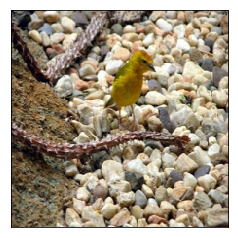

In [12]:
#5,22,23,24,28,29,32,33,31
idx=32
ima=md.val_ds.ds.denorm(to_np(x))[idx]
ax = show_img(ima)

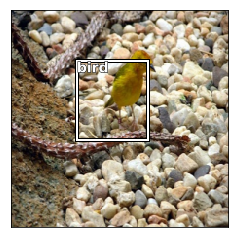

In [13]:
bb = expit(y[idx][:4])*224
b = bb_hw(bb)
c = np.argmax(y[idx][4:])
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[c])



#### Use case 1 of classification

ケース１について

物の認識はclassification手法です。離散多値でした。　例：　クルマ、椅子、馬、など。


#### Use case 1 of regression

ケース１について

物の位置を探知はregression手法です。

左上と右下情報を測定でした。　例：　255*255の画像に対して　左上(18,95)　右下(120,150)


# Case 2 
Restart kernel

###### 自然言語処理
テキストの感情認識

In [1]:
import os
os.chdir('/home/yanhua/Documents/jupyter/yan/demo/RNN/Natural_Language_Processing')
# about 1 minute.
# # Sentiment Detection
# 
# sentiment analysis model
# 
# This program is positive or negative detection. we also can do multi-sentiment analysis by [softmax function](https://en.wikipedia.org/wiki/Softmax_function)
# 
# 自然言語処理:(文章の感情認識)
# 

# #### SalesForce AI platform : einstein
# 
# https://einstein.ai/products
# 
# https://einstein.ai/research/learned-in-translation-contextualized-word-vectors

# ### Loadding library

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
import torchtext
from torchtext import vocab, data
from torchtext.datasets import language_modeling
from fastai.rnn_reg import *
from fastai.rnn_train import *
from fastai.nlp import *
from fastai.lm_rnn import *
import dill as pickle
import spacy
# ### Data
# The  http://ai.stanford.edu/~amaas/data/sentiment/ contains a collection of 50,000 reviews from IMDB. 
# 
# The dataset is divided into training and test sets. The training set is the same 25,000 labeled reviews.
# 
# ##### /home/yanhua/Documents/jupyter/yan/demo/RNN/Natural_Language_Processing/data/aclImdb/train

PATH='data/aclImdb/'
TRN_PATH = 'train/all/'
VAL_PATH = 'test/all/'
TRN = f'{PATH}{TRN_PATH}'
VAL = f'{PATH}{VAL_PATH}'
# # Language model tokenizetion
# 
# 
# Before we can analyze text, we must first *tokenize* it.using [spacy](https://spacy.io/) for tokenize.
# 
spacy_tok = spacy.load('en')
bs=64; bptt=70
# ### data pre-processing for training model.
# wait a moment...

# After building our `ModelData` object,`TEXT.vocab`. This is a *vocabulary*, which stores which words (or *tokens*) have been seen in the text.
em_sz = 200  # size of each embedding vector
nh = 500     # number of hidden activations per layer
nl = 3       # number of layers

# create a version of the *Adam* optimizer
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))
#  the state of the art [AWD LSTM Language Model](https://arxiv.org/abs/1708.02182) . [wikipedia LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory)
# ## I trained the language model about 15 hours.
# # Sentiment classifier model 
# ### data pre-processing for training model.
# wait a moment...
# 
# pickle.dump(TEXT, open(f'{PATH}models/TEXT.pkl','wb'))
TEXT = pickle.load(open(f'{PATH}models/TEXT.pkl','rb'))
IMDB_LABEL = data.Field(sequential=False)
splits = torchtext.datasets.IMDB.splits(TEXT, IMDB_LABEL, 'data/')
md2 = TextData.from_splits(PATH, splits, bs)
# ## Using half of the language model - the *encoder*
m3 = md2.get_model(opt_fn, 1500, bptt, emb_sz=em_sz, n_hid=nh, n_layers=nl, 
           dropout=0.1, dropouti=0.4, wdrop=0.5, dropoute=0.05, dropouth=0.3)
m3.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
# using the language model encoder
m3.load_encoder(f'adam3_20_enc')
# ### fine-tuning a pretrained model
# 
# ## I trainded the sentiment model about 5 hours
m3.clip=25.
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])
m3.load_cycle('imdb2', 6)
# softmax function
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [2]:
trn_files = !ls {TRN}
review = !cat {TRN}{trn_files[1]}
review[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [3]:
m3

SequentialRNN(
  (0): MultiBatchRNN(
    (encoder): Embedding(37392, 200, padding_idx=1)
    (encoder_with_dropout): EmbeddingDropout(
      (embed): Embedding(37392, 200, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDrop(
        (module): LSTM(200, 500)
      )
      (1): WeightDrop(
        (module): LSTM(500, 500)
      )
      (2): WeightDrop(
        (module): LSTM(500, 200)
      )
    )
    (dropouti): LockedDropout(
    )
    (dropouths): ModuleList(
      (0): LockedDropout(
      )
      (1): LockedDropout(
      )
      (2): LockedDropout(
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): ModuleList(
      (0): LinearBlock(
        (lin): Linear(in_features=600, out_features=3, bias=True)
        (drop): Dropout(p=0.1)
        (bn): BatchNorm1d(600, eps=1e-05, momentum=0.1, affine=True)
      )
    )
  )
)

###### the following must be done. 

please wait a moment.

In [2]:
accuracy_np(*m3.predict_with_targs())

0.924

#### Test the sentiment model

In [3]:
ms=m3.model

In [6]:
#ss=""". this movie is not bad, but..."""
#ss=""". this movie is good."""
#ss=""". I like this movie. this is great!"""
#ss=""". this movie is bad."""

# #### test online movie reviews
# https://www.imdb.com/title/tt7700730/reviews
#ss="""What an amazing movie and amazing music."""
ss="""Great script and Varun Dhawan make it must watch cinema for cinema lovers."""

#ss=""". this movie is terrible."""
s = [TEXT.tokenize(ss)]
t = TEXT.numericalize(s)
ss,t

('Great script and Varun Dhawan make it must watch cinema for cinema lovers.',
 Variable containing:
     0
   242
     5
     0
     0
   106
    11
   220
   124
   466
    22
   466
  1797
     4
 [torch.cuda.LongTensor of size 14x1 (GPU 0)])

#### sentiment detection : unkwon, negtive, postive (percentile)
#### out features is 3 . ->  unkown , negative , positive .

In [7]:
res,*_ = ms(t)
# res.data
aa=np.float16(res.data)
print(softmax(aa))

[[0.     0.3545 0.645 ]]


In [7]:
m3.get_layer_groups()

[(Embedding(37392, 200, padding_idx=1), LockedDropout(
  )), (WeightDrop(
    (module): LSTM(200, 500)
  ), LockedDropout(
  )), (WeightDrop(
    (module): LSTM(500, 500)
  ), LockedDropout(
  )), (WeightDrop(
    (module): LSTM(500, 200)
  ), LockedDropout(
  )), PoolingLinearClassifier(
   (layers): ModuleList(
     (0): LinearBlock(
       (lin): Linear(in_features=600, out_features=3, bias=True)
       (drop): Dropout(p=0.1)
       (bn): BatchNorm1d(600, eps=1e-05, momentum=0.1, affine=True)
     )
   )
 )]

#### Use case 2 of classification

ケース２について

文章の感情認識はclassification手法です。離散多値でした。　例：　どうちもない、賛成、反対。

感情情報を探知し、あと、科学的に気持ちが商売、選挙など人間の行動に連動するので、更に別の設計でビジネス応用することが可能です。

IoT (apple watch)

## Case1とCase2 画像とテキストの処理について

情報処理は次世代になりました。非構造化の情報を処理することができました。

従来のデータ、データベースに格納して、構造化されるデータと言います。

これから、情報は、画像、テキスト、音声の非構造化なデータから人工知能で処理し、ビジネスに応用することができます。


# Case 3

### about the decision-making processing for business production in fueture

Reinforcement Learning  - Policy Gradient

### あるビジネス目的に対して、人工知能の意思決定し、最適な行動する。


意思決定の理論：数学のゲーム理論（game thoery and nonliner dynamic system）

意思決定のアルゴリズム：reinforcement learning.

感情認識機能などを含め、マーケティング行動を意思決定するアルゴリズムは可能になります。

#### ゲーム（CartPole）ニューラルネットワークでコントロール

スコアを最大化のタスクに対して、最適な行動の意思決定し、より良い結果を得ます。

In [9]:
import os
os.chdir('/home/yanhua/Documents/jupyter/yan/demo/Policy_gradient_softmax')

import gym
import time
env = gym.make('CartPole-v0')
for i_episode in range(3):
    observation = env.reset()
    for t in range(200):
        env.render()
        time.sleep(0.02)
#        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
#        print(reward)
#        if done:
#            print("Episode finished after {} timesteps".format(t+1))
#            break

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


In [2]:
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)


Discrete(2)
Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [10]:
import gym
#from RL_brain import PolicyGradient
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

RENDER = False  # rendering wastes time
env = gym.make('CartPole-v0')
env.seed(1)     # reproducible, general Policy gradient has high variance
env = env.unwrapped

# built neural network
# setting the network parameter
output_graph=False
learning_rate=0.01
reward_decay=0.95
    
n_actions = env.action_space.n
n_features = env.observation_space.shape[0]
lr = learning_rate
gamma = reward_decay

ep_obs, ep_as, ep_rs = [], [], []

with tf.name_scope('inputs'):
        tf_obs = tf.placeholder(tf.float32, [None, n_features], name="observations")
        tf_acts = tf.placeholder(tf.int32, [None, ], name="actions_num")
        tf_vt = tf.placeholder(tf.float32, [None, ], name="actions_value")
    # fc1
layer = tf.layers.dense(
        inputs=tf_obs,
        units=10,
        activation=tf.nn.tanh,  # tanh activation
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.3),
        bias_initializer=tf.constant_initializer(0.1),
        name='fc1'
    )
    # fc2
all_act = tf.layers.dense(
        inputs=layer,
        units=n_actions,
        activation=None,
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.3),
        bias_initializer=tf.constant_initializer(0.1),
        name='fc2'
    )

all_act_prob = tf.nn.softmax(all_act, name='act_prob')  # use softmax to convert to probability

with tf.name_scope('loss'):
    # to maximize total reward (log_p * R) is to minimize -(log_p * R), and the tf only have minimize(loss)
    neg_log_prob = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=all_act, labels=tf_acts)   # this is negative log of chosen action
        # or in this way:
        # neg_log_prob = tf.reduce_sum(-tf.log(all_act_prob)*tf.one_hot(tf_acts, n_actions), axis=1)
loss = tf.reduce_mean(neg_log_prob * tf_vt)  # reward guided loss

with tf.name_scope('train'):
    train_op = tf.train.AdamOptimizer(lr).minimize(loss)
    
sess = tf.Session()

if output_graph:
    # $ tensorboard --logdir=logs
    # http://0.0.0.0:6006/
    # tf.train.SummaryWriter soon be deprecated, use following
    tf.summary.FileWriter("logs/", sess.graph)

sess.run(tf.global_variables_initializer())

def choose_action(observation):
    prob_weights = sess.run(all_act_prob, feed_dict={tf_obs: observation[np.newaxis, :]})
    action = np.random.choice(range(prob_weights.shape[1]), p=prob_weights.ravel())  # select action w.r.t the actions prob
    return action

def store_transition(s, a, r):
    ep_obs.append(s)
    ep_as.append(a)
    ep_rs.append(r)

saver = tf.train.Saver()
saver.restore(sess,"/home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt")
RENDER = True

/home/yanhua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
INFO:tensorflow:Restoring parameters from /home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt


In [ ]:
for i_episode in range(1):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        if done:
            break

        observation = observation_

##### for the future


A machine-learning algorithm could analyze the biometric data streaming from sensors on and inside your body, determine your personality type and your changing moods, and calculate the emotional impact that a particular song—even a particular musical key—is likely to have on you.

example: information is from apple watch etc...

##### introduction 'how control the emotions for promotions of business' from Reinforcement Learning and picture of structure 

# what should we do for the business production?


##### 人工知能について、理論的に出来ることについて：

歴史情報を統合し、全て情報を計算することから、前後因果関係が通しのロジックを訓練、フィットする
現状の情報から、訓練したロジックを通じて、良い結果に予測、推薦する。

例えば。（イメージ）
classificationとregressionの全て情報が計算できるので、統合した情報である目的にロジック訓練する。

（上の情報に参考）

#### 要件
##### 開発サイド：

まず有効なデータが一番重要です。データと有効なデータは違います。予測に関連性がなければデータが多くても、効果が無い。有効なデータでも、データの整理、メンテナンスや前処理も必ず必要です。

次は、人工知能の知識です。所謂人工知能に関連する人材です。人工知能に関して現在に知識の進歩が激しく、新しい知識の学習も不可欠です。

最後は、インフラです。人工知能のサーバーなど必要なので、メンテナンスと含め、インフラが必要です。

##### ビジネスサイド：

よく人工知能を理解し、具体的にお客さんのニーズを把握し、解決案など提案することです。また、現状のビジネスに対してアイディアの発想、イノベーション提案は次世代サービスに繋がります。


最大限に情報を利用して、あるものに対して顧客に良い感覚をもっと高めるサービス。（カスタマージャーニーのサービス）
